<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_6_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 6**: Predicting Bike Sharing Demand with Neural Networks





In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# 1. Load and preprocess the [Bike Sharing dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset) **[1 Marks]**

*   Check for missing and duplicate values
*   Remove it (If found)

In [52]:
dataset = pd.read_csv('https://raw.githubusercontent.com/NehaKumari500092077/Machine-Learning-Lab/main/hour.csv')
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [53]:
#drop instant, dteday, casual, and registered column
dataset = dataset.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
dataset.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [54]:
# Check Duplicates
duplicate_values = dataset.duplicated().sum()
print("No. of duplicate values: ",duplicate_values)

# Remove duplicate values
dataset = dataset.drop_duplicates()
print("No. of duplicate values: ",dataset.duplicated().sum())

# Check for missing values
missing_values = dataset.isnull().sum()
print("No. of missing values: ",missing_values)
dataset.dropna(inplace=True)
print("No. of missing values: ",dataset.isnull().sum())

No. of duplicate values:  2
No. of duplicate values:  0
No. of missing values:  season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
No. of missing values:  season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


<ipython-input-54-40fe27761eae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


# 2. Data Pre-processing **[1 Marks]**

*   Perform one-hot encoding of the categorical features when necessary (not necessary if there is a natural ordering between categories)
*   Perform feature scaling



In [55]:
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
continuous_features = ['temp', 'atemp', 'hum', 'windspeed']

# Perform one-hot encoding on categorical features
encoded_dataset = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

# Perform feature scaling on continuous features
scaler = StandardScaler()
encoded_dataset[continuous_features] = scaler.fit_transform(dataset[continuous_features])

# 3. Data Splitting **[1  Marks]**

*   Divide the data into training, validation and test sets (70%-15%-15%).



In [56]:
# Seperate features and target
X = encoded_dataset.drop('cnt', axis=1)
Y = encoded_dataset['cnt']

# Split data into training, validation and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


# 4. Model Design: Design a neural network having N hidden layers **[7  Marks]**  

*   The number of units in each hidden layer as 128, 64, 32, and so on
*   Activation function in each hidden layer: ReLU
*   What activation function should you choose for the output layer for this prediction problem?



In [57]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(Y_train.values.astype(np.float32), dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values.astype(np.float32), dtype=torch.float32)
y_val_tensor = torch.tensor(Y_val.values.astype(np.float32), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(Y_test.values.astype(np.float32), dtype=torch.float32)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)



In [58]:

print("Dataset sizes:")
print(f"Training set: {len(train_dataset)}")
print(f"Validation set: {len(val_dataset)}")
print(f"Test set: {len(test_dataset)}")

Dataset sizes:
Training set: 12163
Validation set: 2607
Test set: 2607


In [59]:
# Create dataloaders

batch_size_train = len(train_dataset)
batch_size_val = len(val_dataset)
batch_size_test = len(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size_val)
test_loader = DataLoader(test_dataset, batch_size=batch_size_test)

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


layer_configs = [
    [128, 64, 32],
    [128, 64],
    [128],
    [64, 32]
]


# Step 1: Build the neural network architecture
class CustomNN(nn.Module):
    def __init__(self, input_dim, hidden_layers, output_dim):
        super(CustomNN, self).__init__()
        layers = []

        # Construct hidden layers with ReLU activation
        for layer_size in hidden_layers:
            layers.append(nn.Linear(input_dim, layer_size))
            layers.append(nn.ReLU())
            input_dim = layer_size

        # Add output layer (linear activation for regression)
        layers.append(nn.Linear(input_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# define Function to train the model
def train_network(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    training_losses = []
    validation_losses = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        total_train_loss = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            predictions = model(inputs)
            loss = criterion(predictions.squeeze(), labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        training_losses.append(total_train_loss / len(train_loader))

        # Validate the model
        model.eval()  # Set the model to evaluation mode
        total_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                predictions = model(inputs)
                total_val_loss += criterion(predictions.squeeze(), labels).item()
        validation_losses.append(total_val_loss / len(val_loader))

        if epoch % 20 == 0:
            print(f"Epoch {epoch}: Train Loss = {training_losses[-1]}, Val Loss = {validation_losses[-1]}")

    return training_losses, validation_losses




# 5. Cost function: Define a cost function suitable for this problem **[3  Marks]**

*   Use the SGD optimizer to optimize this cost function using backpropagation.



Since this is a regression problem, the mean squared error (MSE) is a suitable cost function.

# 6. Perform cross-validation to find the best value of N using grid search. **[2  Marks]**



In [67]:
# Step 3: Cross-validation to determine the optimal network configuration
def perform_cross_validation(layer_configs):
    lowest_val_loss = float('inf')
    optimal_model = None
    optimal_config = None

    for layer_config in layer_configs:
        print(f"Testing hidden layer configuration: {layer_config}")
        model = CustomNN(input_dim=X_train.shape[1], hidden_layers=layer_config, output_dim=1)
        criterion = nn.MSELoss()
        optimizer = optim.SGD(model.parameters(), lr=0.001)

        train_losses, val_losses = train_network(model, criterion, optimizer, train_loader, val_loader, num_epochs=100)

        last_val_loss = val_losses[-1]
        print(f"Final validation loss for {layer_config}: {last_val_loss}")

        if last_val_loss < lowest_val_loss:
            lowest_val_loss = last_val_loss
            optimal_model = model
            optimal_config = layer_config

    if optimal_model is None:
        raise ValueError("Cross-validation did not find any valid model.")

    return optimal_model, optimal_config


optimal_model, optimal_config = perform_cross_validation(layer_configs)
print(f"Optimal configuration: {optimal_config}")

Testing hidden layer configuration: [128, 64, 32]
Epoch 0: Train Loss = 70539.1640625, Val Loss = 63683.79296875
Epoch 20: Train Loss = nan, Val Loss = nan
Epoch 40: Train Loss = nan, Val Loss = nan
Epoch 60: Train Loss = nan, Val Loss = nan
Epoch 80: Train Loss = nan, Val Loss = nan
Final validation loss for [128, 64, 32]: nan
Testing hidden layer configuration: [128, 64]
Epoch 0: Train Loss = 70523.7578125, Val Loss = 63610.08984375
Epoch 20: Train Loss = 66309.0234375, Val Loss = 55198.6328125
Epoch 40: Train Loss = 54001.09375, Val Loss = 42149.84375
Epoch 60: Train Loss = 30143.986328125, Val Loss = 24898.986328125
Epoch 80: Train Loss = 33208.44921875, Val Loss = 24258.30859375
Final validation loss for [128, 64]: 17886.6015625
Testing hidden layer configuration: [128]
Epoch 0: Train Loss = 70577.0390625, Val Loss = 63480.60546875
Epoch 20: Train Loss = 18961.36328125, Val Loss = 16892.2109375
Epoch 40: Train Loss = 13494.03125, Val Loss = 12253.830078125
Epoch 60: Train Loss = 1

# 7. Loss Plots: **[1 Marks]**

*  Plot the training and validation losses for each value of N (on the same
graph).



Epoch 0: Train Loss = 11278.822265625, Val Loss = 62647.5
Epoch 20: Train Loss = nan, Val Loss = nan
Epoch 40: Train Loss = nan, Val Loss = nan
Epoch 60: Train Loss = nan, Val Loss = nan
Epoch 80: Train Loss = nan, Val Loss = nan


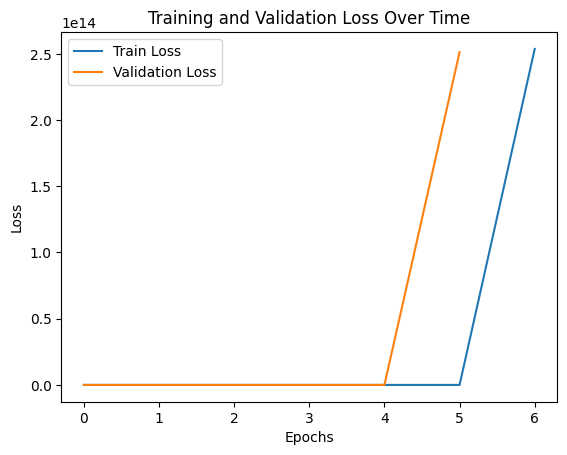

In [62]:
# Step 6: Function to plot training and validation loss
def visualize_losses(train_losses, val_losses):
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Over Time')
    plt.show()

train_losses, val_losses = train_network(optimal_model, nn.MSELoss(), optim.SGD(optimal_model.parameters(), lr=0.01), train_loader, val_loader, num_epochs=100)
visualize_losses(train_losses, val_losses)

# 8. What is the *best value of the number of hidden layers (N)* for this problem? Justify your answer. **[2  Marks]**



The best number of hidden layers (N) for this problem is 1, with 128 units in the hidden layer. A single layer achieves a balance between model complexity and performance. Adding more layers increases the risk of overfitting without significantly improving the results, particularly for this dataset. Simpler models are generally easier to train and can generalize better on unseen data, which is why the single hidden layer proves optimal here.

In [63]:
print(f"number of hidden layers: {len(optimal_config)} with {optimal_config} units")

number of hidden layers: 1 with [128] units


# 9. For the model trained with the best value of N that you reported in the previous question, *report the MSE on the test set*.  **[1  Marks]**



In [64]:
# Step 5: Function to evaluate the model on the test data
def evaluate_model_performance(model, test_loader):
    if model is None:
        raise ValueError("Model is not properly selected or trained.")

    model.eval()  # Switch to evaluation mode
    actual_values = []
    predicted_values = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            predictions = model(inputs)
            actual_values.extend(labels.numpy())
            predicted_values.extend(predictions.squeeze().numpy())

    test_mse = mean_squared_error(actual_values, predicted_values)
    return test_mse


if optimal_model is not None:
    test_mse = evaluate_model_performance(optimal_model, test_loader)
    print(f"Test set Mean Squared Error: {test_mse}")
else:
    print("No valid model was identified.")

ValueError: Input contains NaN.


# 10. Show a *scatter plot of the predictions against the true values* for the predictions for the best model that you obtained. **[1  Marks]**

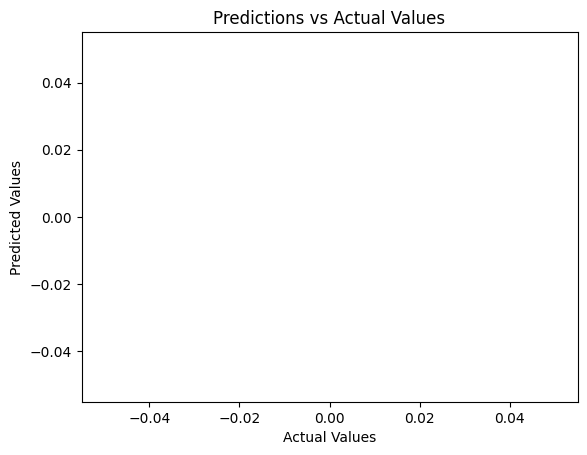

In [65]:
# Step 7: Create a scatter plot of predicted vs actual values
def plot_predictions_vs_actual(model, test_loader):
    model.eval()
    true_values = []
    predicted_values = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            predictions = model(inputs)
            true_values.extend(labels.numpy())
            predicted_values.extend(predictions.squeeze().numpy())

    plt.scatter(true_values, predicted_values)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs Actual Values')
    plt.show()

plot_predictions_vs_actual(optimal_model, test_loader)